# Bike sharing assignment

###### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


#### Step 1: Reading and Understanding the Data

In [10]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
#Loading data
bikedata = pd.read_csv("day.csv")
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
#Data understanding
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bikedata.shape

(730, 16)

In [6]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Checking missing values
bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# percentage of missing values in each column
bikedata.isnull().sum()*100/bikedata.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no missing values

In [9]:
#duplicate 
bikedata_copy = bikedata.copy()
bikedata_copy.drop_duplicates(subset = None, inplace=True)

In [10]:
bikedata.shape

(730, 16)

In [11]:
bikedata_copy.shape

(730, 16)

### Step 2: Data Preparation

###### Removing columns irrelavent to our analysis
1. instant - It's an index 
2. dteday - It represents date. But we have separate columns 'yr' and 'mnth'
3. casual, registered - sum of these two columns are represented as 'cnt' column which is only required for model building

In [12]:
bikedata.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Dummy variable creation

Mapping values to dummy variables

In [14]:
bikedata.season = bikedata.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bikedata.weathersit = bikedata.weathersit.map({1: "clear", 2: "mist", 3 : "light snow/rain", 4 : "heavy rain"})
bikedata.mnth = bikedata.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikedata.weekday = bikedata.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [15]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
season_bikedata=pd.get_dummies(bikedata.season,drop_first=True)
mnth_bikedata=pd.get_dummies(bikedata.mnth,drop_first=True)
weekday_bikedata=pd.get_dummies(bikedata.weekday,drop_first=True)
weathersit_bikedata=pd.get_dummies(bikedata.weathersit,drop_first=True)

In [17]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bikedata_new = pd.concat([bikedata,season_bikedata,weathersit_bikedata,mnth_bikedata,weekday_bikedata],axis=1)
bikedata_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [20]:
bikedata_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,False,False,False,False,False,True,False,False,False,False
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,False,False,False,False,False,False,True,False,False,False
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,False,False,False
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,False,False,False,False,False,False,False,False,True,False
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,False,False,True


In [21]:
bikedata_new.shape

(730, 34)

In [22]:
bikedata_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [23]:
bikedata_new.shape

(730, 30)

In [24]:
bikedata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    bool   
 9   summer           730 non-null    bool   
 10  winter           730 non-null    bool   
 11  light snow/rain  730 non-null    bool   
 12  mist             730 non-null    bool   
 13  aug              730 non-null    bool   
 14  dec              730 non-null    bool   
 15  feb              730 non-null    bool   
 16  jan              730 non-null    bool   
 17  jul             

In [25]:
# List of variables to map

varlist =  ['spring','summer','winter','mist','light snow/rain','jan','feb','mar','may','jun','jul','aug','sept','oct','nov','dec','sun','mon','tue','wed','thu','sat']

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the bikedata
bikedata_new[varlist] = bikedata_new[varlist].apply(binary_map)

In [26]:
bikedata_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
bikedata_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### Step 3 : Exploratory Data Analysis

#### Univariate analysis

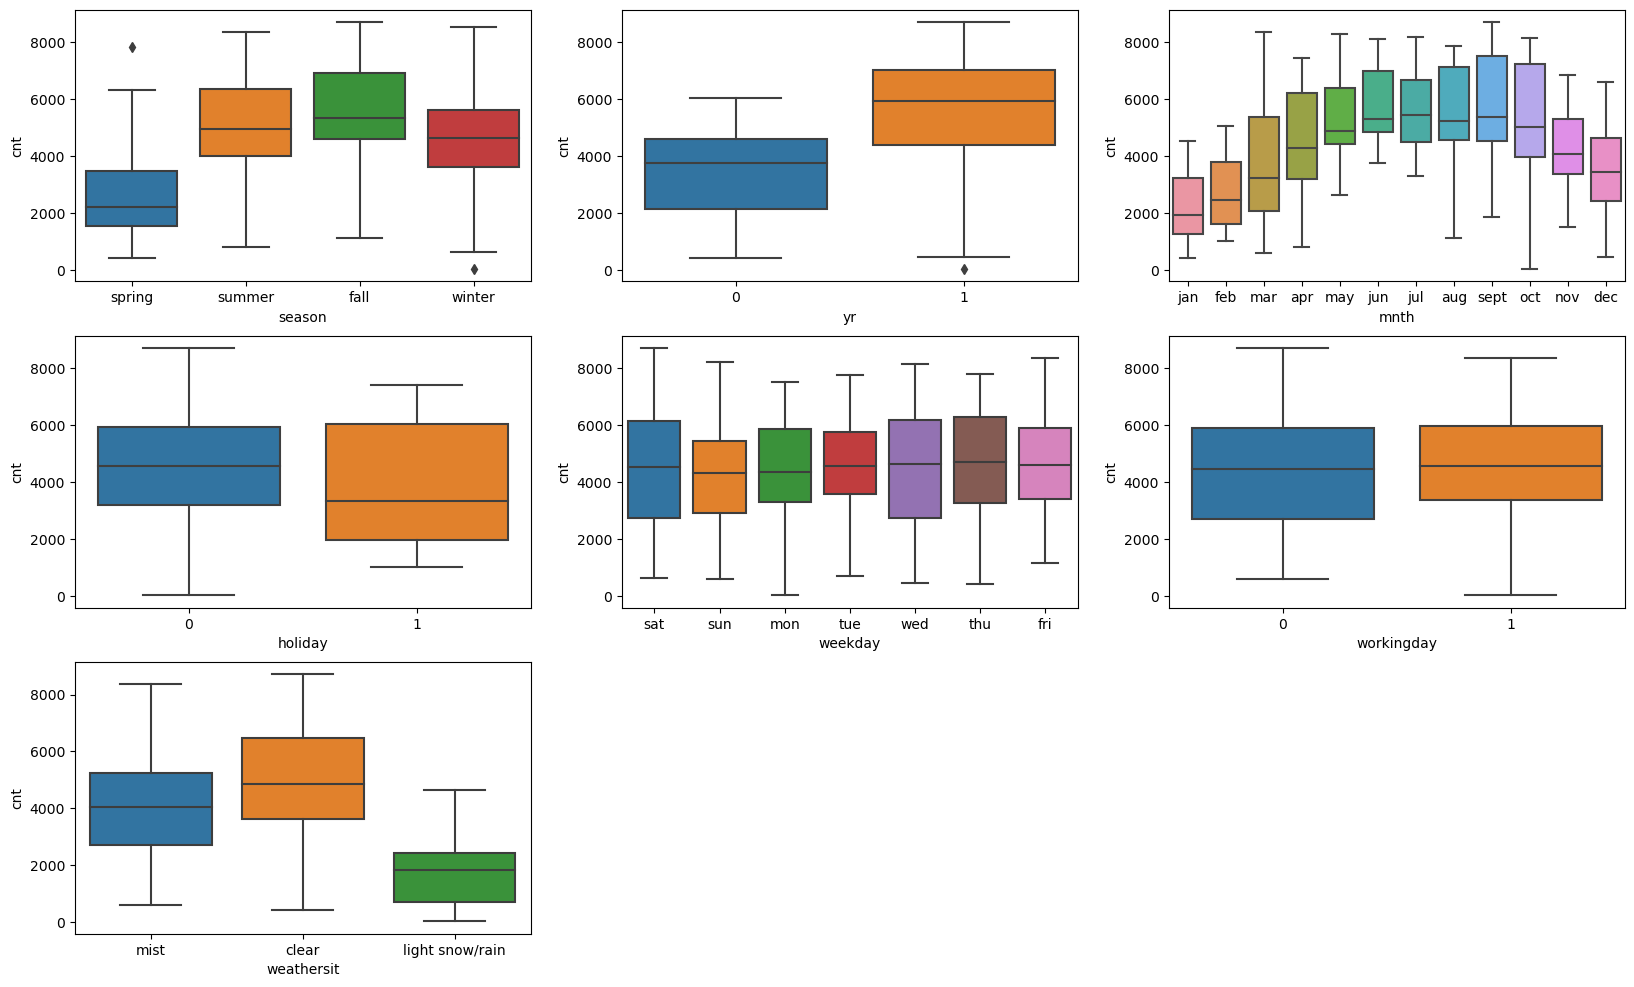

In [28]:
#Visualising Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikedata)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikedata)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedata)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedata)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedata)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedata)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedata)
plt.show()

- Fall season is having more booking
- Jun, aug, sep and oct months are having more booking than rest of the year
- Clear weather has more booking
- There are more booking on holiday than weekdays

#### Bivariate analysis

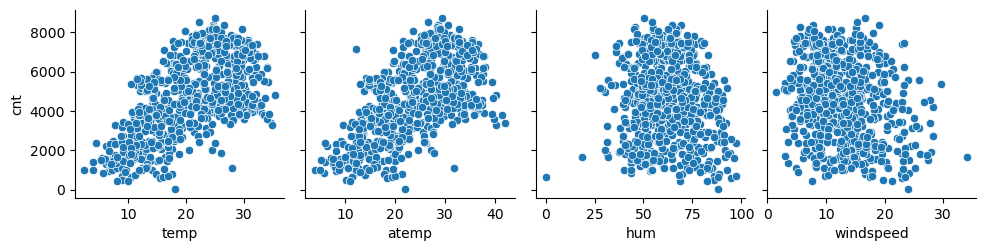

In [29]:
#visualise the data
sns.pairplot(data=bikedata_new, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt')

There is a linear relationship between temp and cnt

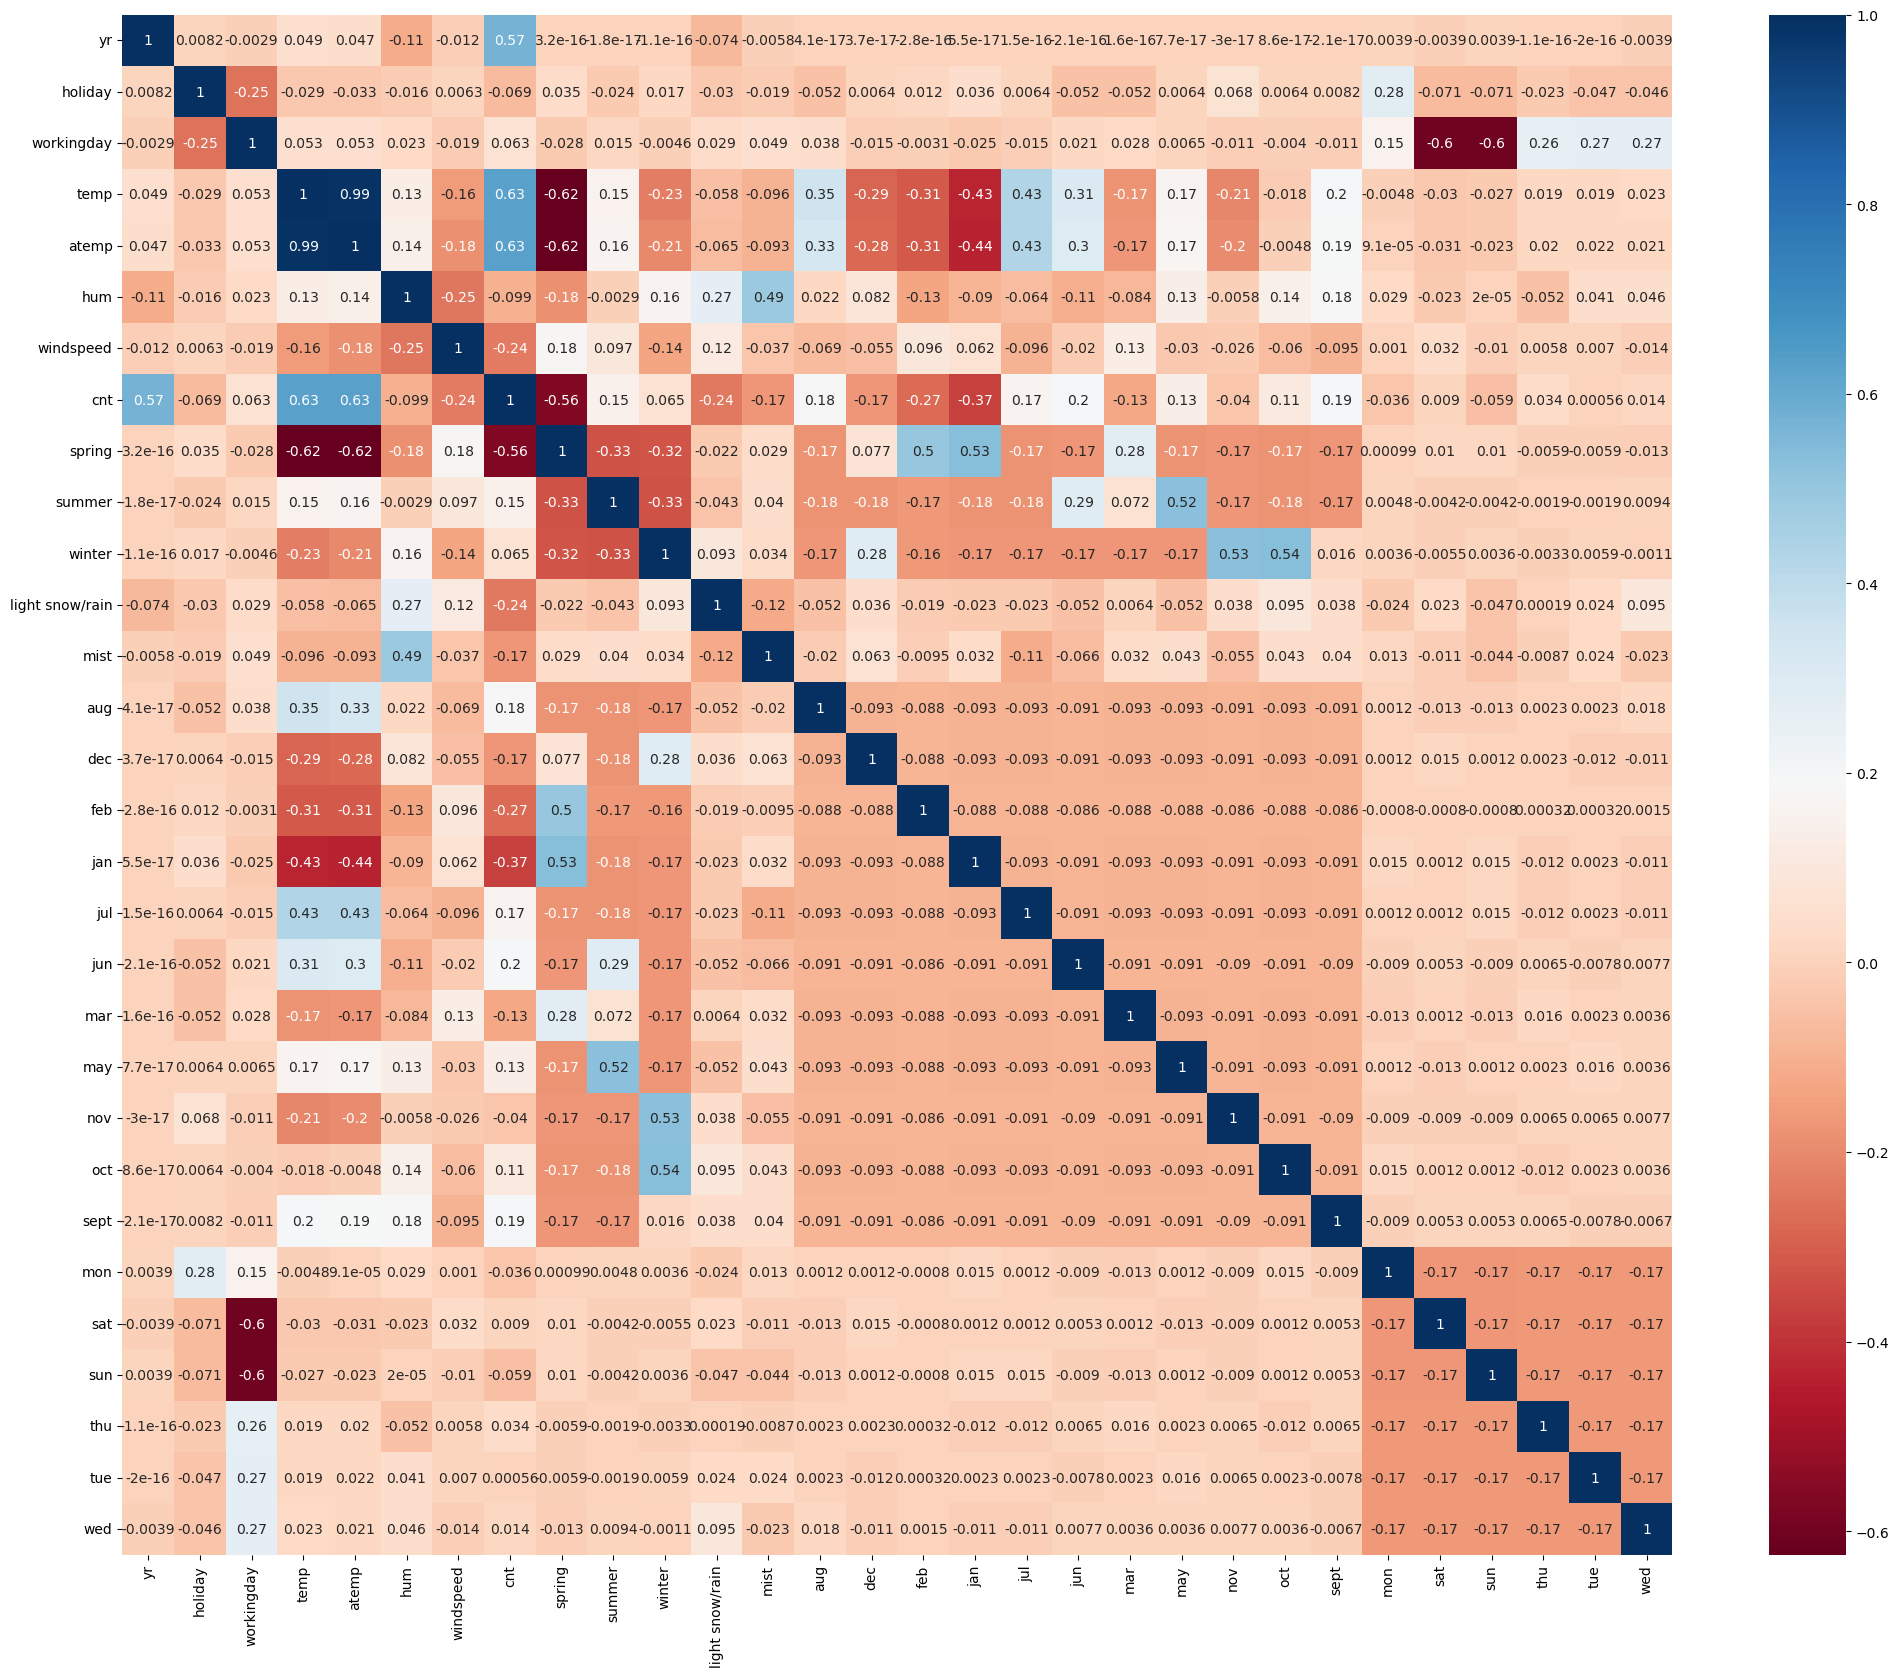

In [30]:
#Correlation matrix
plt.figure(figsize = (25,20))
sns.heatmap(bikedata_new.corr(), annot = True, cmap = "RdBu" )
plt.show()

### Step 4 : Splitting the Data into Training and Testing Sets

In [31]:
np.random.seed(0)
df_train, df_test  = train_test_split(bikedata_new, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the Features

In [32]:
scaler = MinMaxScaler()

In [33]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'light snow/rain', 'mist', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


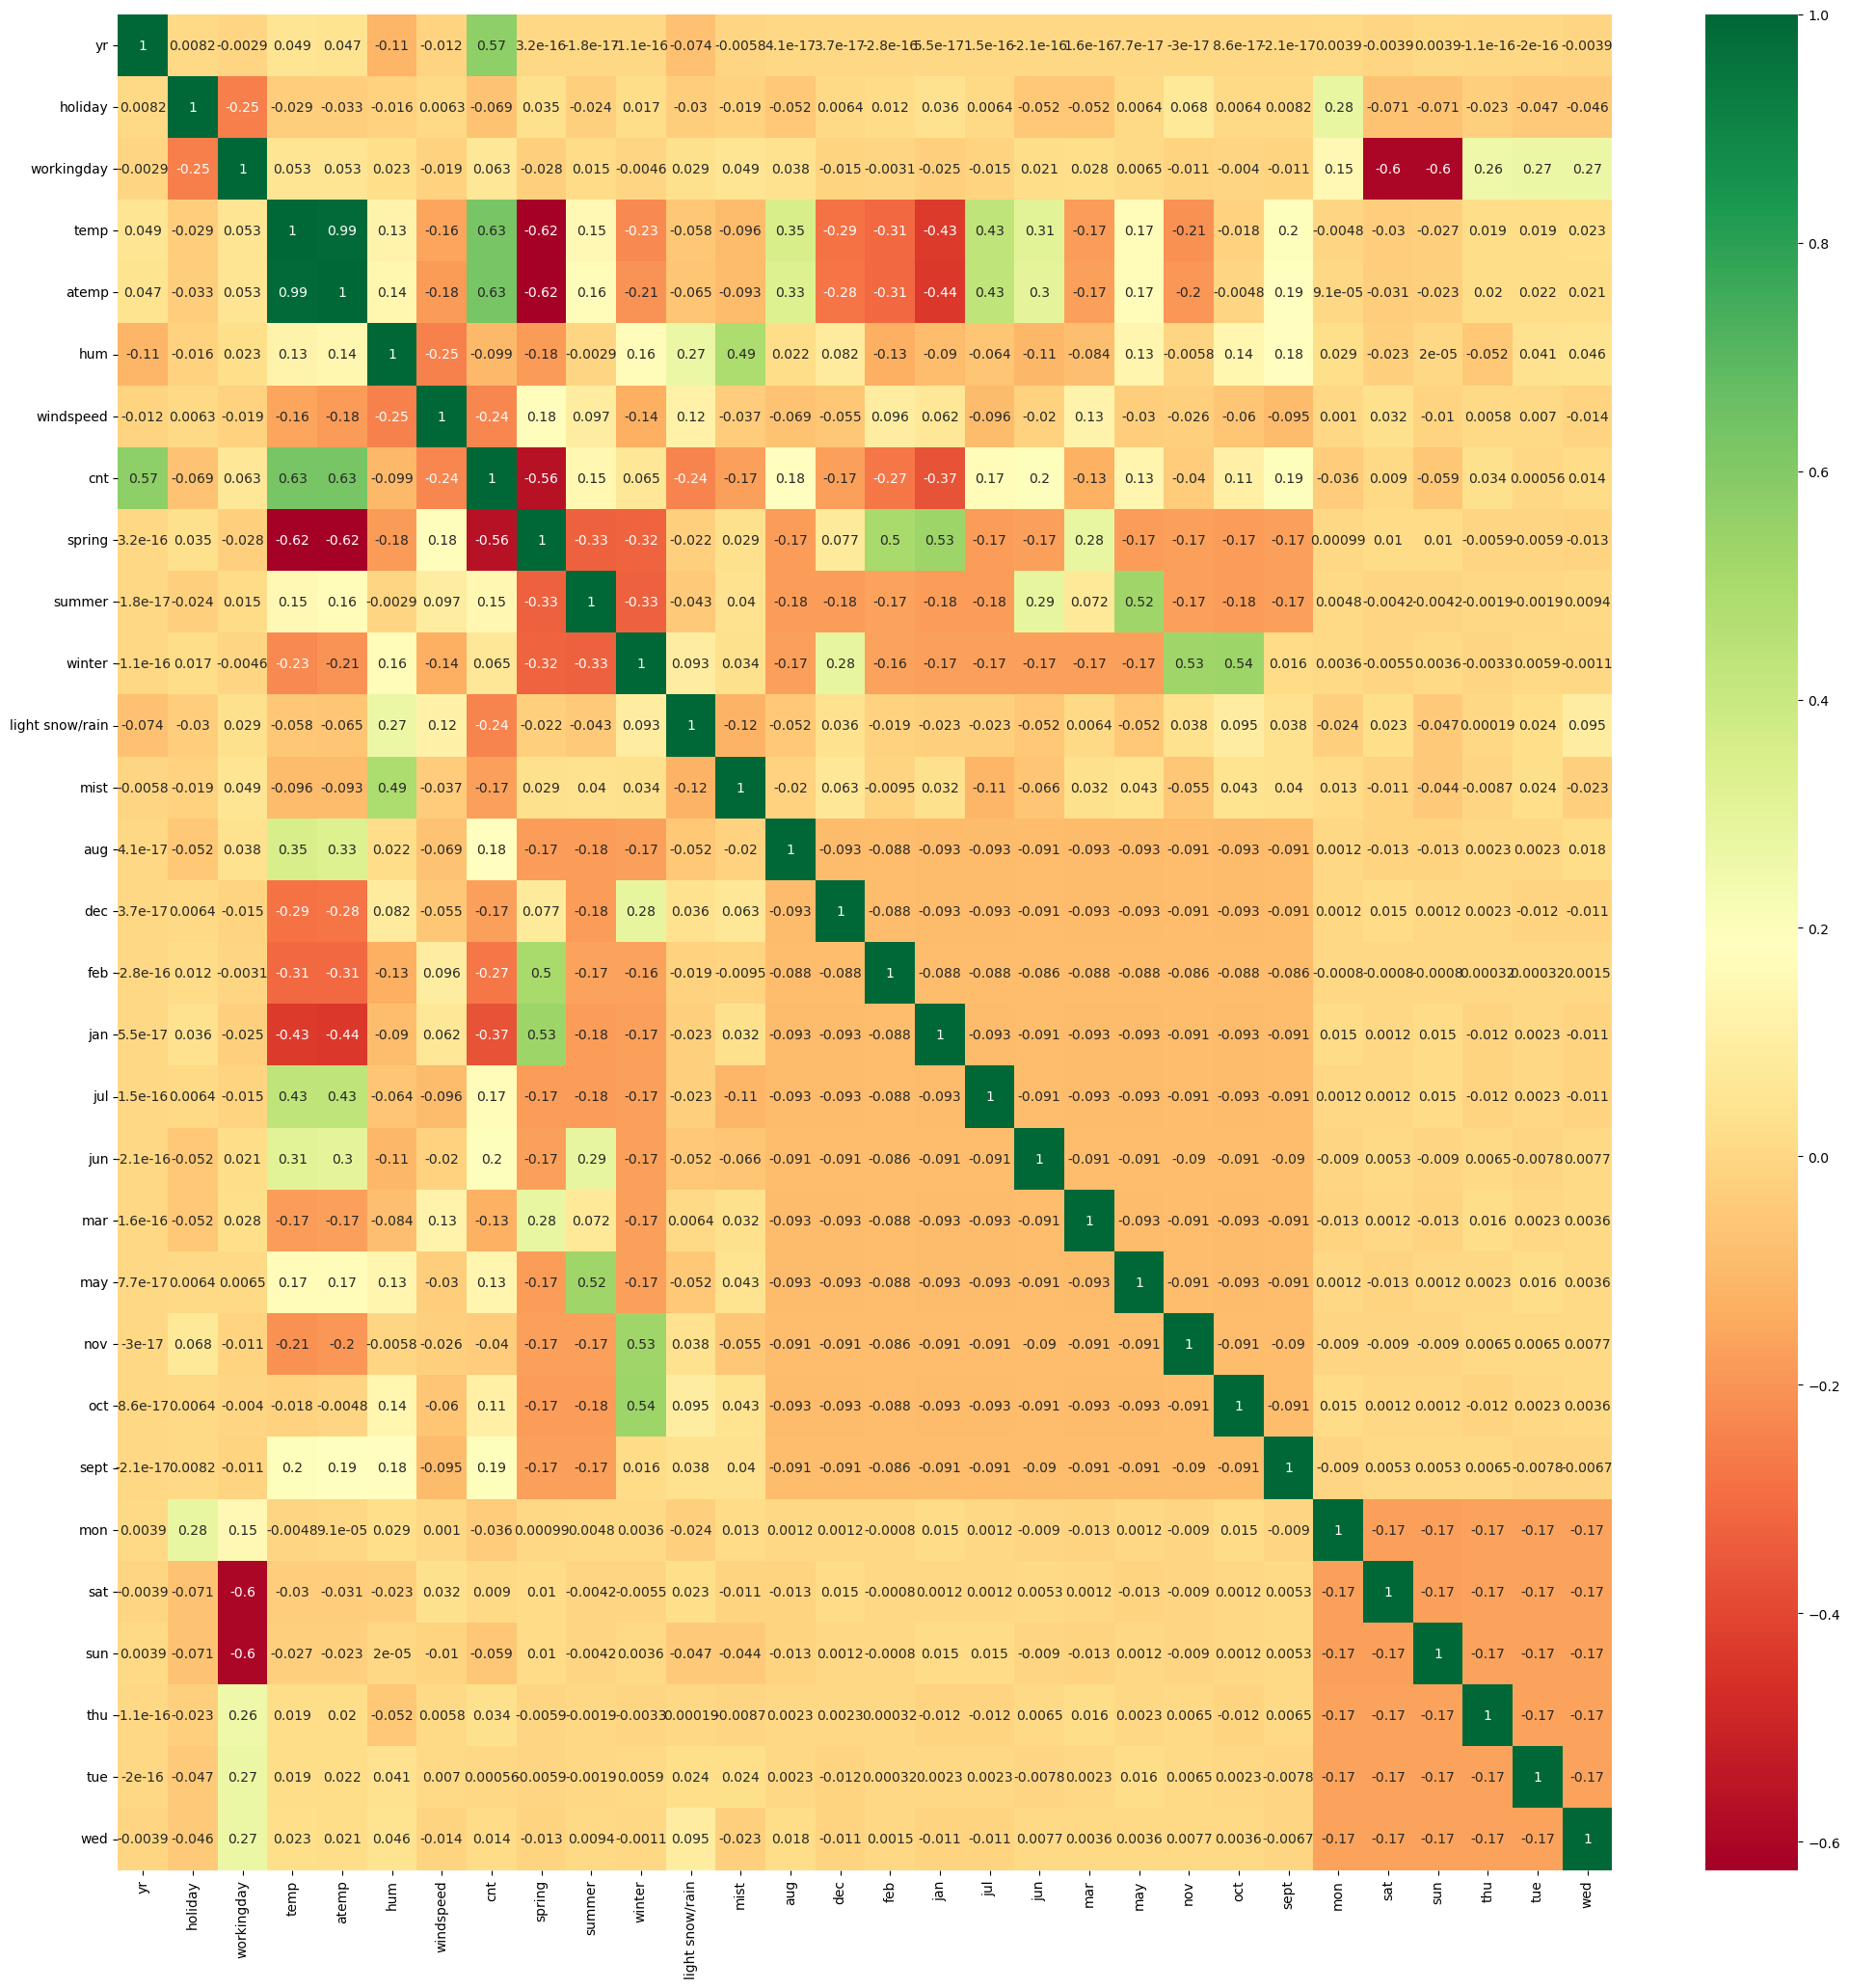

In [36]:
plt.figure(figsize = (25, 25))
sns.heatmap(bikedata_new.corr(), annot = True, cmap="RdYlGn")
plt.show()

# Step 5 : RFE - Recursive Feature Elimination

In [37]:
# Putting feature variable to X
X_train = df_train

# Putting response variable to y
y_train = df_train.pop('cnt')

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step = 15)        
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light snow/rain', True, 1),
 ('mist', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light snow/rain', 'mist', 'dec', 'jan', 'nov', 'sept'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'aug', 'feb', 'jul', 'jun', 'mar', 'may', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [42]:
X_train_rfe = X_train[col]

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,351.98
2,temp,349.13
4,hum,24.11
5,windspeed,4.12
7,winter,2.99
6,spring,2.93
9,mist,2.26
0,yr,2.06
12,nov,1.82
11,jan,1.73


# Step 6 : Build a linear model

In [44]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          3.28e-185
Time:                        23:29:58   Log-Likelihood:                 502.46
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3748      0.032     

In [45]:
lr.params

const              0.374815
yr                 0.232999
holiday           -0.087785
temp               0.302013
atemp              0.087836
hum               -0.132541
windspeed         -0.172440
spring            -0.105128
winter             0.074267
light snow/rain   -0.260138
mist              -0.057534
dec               -0.051503
jan               -0.058020
nov               -0.053796
sept               0.068086
dtype: float64

###### Build a linear model - 1

In [46]:
X_train_lm1 = sm.add_constant(X_train[['temp']])

In [47]:
lr1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           5.80e-61
Time:                        23:30:21   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [48]:
lr1.params

const    0.169798
temp     0.639952
dtype: float64

###### Build a linear model - 2

In [49]:
X_train_lm2 = sm.add_constant(X_train[['temp','atemp']])

In [50]:
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.95e-60
Time:                        23:30:24   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

In [51]:
lr2.params

const    0.163383
temp     0.181818
atemp    0.492316
dtype: float64

###### Build a linear model - 3

In [52]:
X_train_lm3 = sm.add_constant(X_train[['temp','atemp','hum']])

In [53]:
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     136.7
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           7.24e-65
Time:                        23:30:26   Log-Likelihood:                 189.88
No. Observations:                 510   AIC:                            -371.8
Df Residuals:                     506   BIC:                            -354.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3209      0.036      8.868      0.0

In [54]:
lr3.params

const    0.320935
temp     0.080066
atemp    0.630482
hum     -0.267176
dtype: float64

###### Build a linear model - 4

In [55]:
X_train_lm4 = sm.add_constant(X_train[['temp','atemp','hum','windspeed']])

In [56]:
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     114.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.85e-69
Time:                        23:30:28   Log-Likelihood:                 203.18
No. Observations:                 510   AIC:                            -396.4
Df Residuals:                     505   BIC:                            -375.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4548      0.044     10.412      0.0

In [57]:
lr4.params

const        0.454823
temp         0.276113
atemp        0.390559
hum         -0.328808
windspeed   -0.237101
dtype: float64

###### Build a linear model - 5

In [58]:
X_train_lm5 = sm.add_constant(X_train[['temp','atemp','hum','windspeed','spring']])

In [59]:
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     109.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           4.65e-78
Time:                        23:30:30   Log-Likelihood:                 225.82
No. Observations:                 510   AIC:                            -439.6
Df Residuals:                     504   BIC:                            -414.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5963      0.047     12.779      0.0

In [60]:
lr5.params

const        0.596319
temp         0.229100
atemp        0.272957
hum         -0.368060
windspeed   -0.225194
spring      -0.140663
dtype: float64

### Step 7 : VIF - Variance Inflation Factor

1. One method to detect multicollinearity is to calculate the variance inflation factor (VIF) for each independent variable, and a VIF value greater than 1.5 indicates multicollinearity.

2. We could simply drop the variable with the highest, non-significant p value.

#### Checking VIF

#### Dropping 'atemp' as it has high VIF (351.98)

In [61]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.57
2,temp,14.20
4,windspeed,4.03
6,winter,2.97
5,spring,2.93
8,mist,2.26
0,yr,2.06
11,nov,1.82
10,jan,1.73
9,dec,1.53


In [63]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params 

const              0.376337
yr                 0.232974
holiday           -0.088414
temp               0.382850
hum               -0.130791
windspeed         -0.175305
spring            -0.105147
winter             0.074971
light snow/rain   -0.261609
mist              -0.057795
dec               -0.051774
jan               -0.058707
nov               -0.054085
sept               0.067907
dtype: float64

In [64]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          2.80e-186
Time:                        23:30:35   Log-Likelihood:                 502.25
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3763      0.032     

#### Dropping 'hum' as it has high VIF (23.57)

In [65]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.99
2,temp,3.79
5,winter,2.50
4,spring,2.36
0,yr,2.06
10,nov,1.80
9,jan,1.64
7,mist,1.51
8,dec,1.46
11,sept,1.17


In [67]:
X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train, X_train_lm7).fit()
lr7.params 

const              0.306590
yr                 0.235987
holiday           -0.089299
temp               0.359293
windspeed         -0.151986
spring            -0.107014
winter             0.067042
light snow/rain   -0.297517
mist              -0.078946
dec               -0.056040
jan               -0.062342
nov               -0.053092
sept               0.064047
dtype: float64

In [68]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          6.19e-185
Time:                        23:30:38   Log-Likelihood:                 496.28
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     497   BIC:                            -911.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3066      0.025     

#### Dropping 'nov' as it has high p-value

In [69]:
X_train_new = X_train_new.drop(["nov"], axis = 1)

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.95
2,temp,3.77
4,spring,2.35
0,yr,2.06
9,jan,1.64
5,winter,1.61
7,mist,1.51
8,dec,1.29
10,sept,1.16
6,light snow/rain,1.08


In [71]:
X_train_lm8 = sm.add_constant(X_train_new)
lr8 = sm.OLS(y_train, X_train_lm8).fit()
lr8.params 

const              0.293843
yr                 0.235998
holiday           -0.098064
temp               0.376238
windspeed         -0.152070
spring            -0.103202
winter             0.048834
light snow/rain   -0.292774
mist              -0.077803
dec               -0.037720
jan               -0.057117
sept               0.068742
dtype: float64

In [72]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.89e-184
Time:                        23:30:40   Log-Likelihood:                 492.32
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2938      0.025     

##### Dropping 'dec' as it has high p-value

In [73]:
X_train_new = X_train_new.drop(["dec"], axis = 1)

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.95
2,temp,3.76
4,spring,2.24
0,yr,2.06
8,jan,1.60
7,mist,1.51
5,winter,1.37
9,sept,1.16
6,light snow/rain,1.08
1,holiday,1.04


In [75]:
X_train_lm9 = sm.add_constant(X_train_new)
lr9 = sm.OLS(y_train, X_train_lm9).fit()
lr9.params 

const              0.281977
yr                 0.236147
holiday           -0.096163
temp               0.389702
windspeed         -0.145391
spring            -0.105125
winter             0.043315
light snow/rain   -0.289805
mist              -0.077642
jan               -0.048595
sept               0.070398
dtype: float64

In [76]:
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.58e-184
Time:                        23:30:41   Log-Likelihood:                 489.65
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     499   BIC:                            -910.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2820      0.025     

##### Dropping 'jan' as it has high p-value

In [77]:
X_train_new = X_train_new.drop(["jan"], axis = 1)

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
4,spring,1.65
7,mist,1.50
5,winter,1.37
8,sept,1.16
6,light snow/rain,1.08
1,holiday,1.04


In [79]:
X_train_lm10 = sm.add_constant(X_train_new)
lr10 = sm.OLS(y_train, X_train_lm10).fit()
lr10.params 

const              0.267078
yr                 0.235355
holiday           -0.097018
temp               0.407826
windspeed         -0.135566
spring            -0.116181
winter             0.047958
light snow/rain   -0.288462
mist              -0.078597
sept               0.069984
dtype: float64

In [83]:
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          3.31e-184
Time:                        23:41:59   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2671      0.024     

### summary:

The values we are concerned with are -

- The coefficients and significance (p-values)
- R-squared
- F statistic

# Interpretation

##### F-statistic: 265.7
Prob (F-statistic): 3.31e-184

Higher the value of F-statistic, more significant is the model. Here F-statistic is greater than 1, hence it's significant.

###### Coefficients

    const               0.2671            
    yr                  0.2354      
    holiday            -0.0970      
    temp                0.4078  
    windspeed          -0.1356      
    spring             -0.1162      
    winter              0.0480      
    light snow/rain    -0.2885     
    mist               -0.0786     
    sept                0.0700      
   
1. yr, temp, winter, sept - Unit increase in these variable, increases the bike hiring by mentioned units
2. holiday, windspeed, spring, light snow/rain, mist - Unit increase in these variable, decreases the bike hiring by mentioned units

##### VIF - Multicollinearity check



            Features	    VIF
        2	temp            7.03
        3	windspeed	    5.00
        1	workingday	    4.49
        0	yr	            2.00
        4	spring  	    1.90
        9	sat     	    1.71
        5	winter  	    1.45
        7	jul     	    1.40
        8	sept    	    1.19
        6	light snow/rain	1.07

1. VIF value is <5, which is good.
2. we can confirm that there is no multicollinearity between the predictor variables
3. The VIF value of temp(7.03) is greater than 5. But we are not removing it, as it plays a major role in bike sharing.

### Residual analysis
To validate assumptions of the model, and hence the reliability for inference

In [84]:
lr10.params

const              0.267078
yr                 0.235355
holiday           -0.097018
temp               0.407826
windspeed         -0.135566
spring            -0.116181
winter             0.047958
light snow/rain   -0.288462
mist              -0.078597
sept               0.069984
dtype: float64

In [85]:
X_train_lm10

,const,yr,holiday,temp,windspeed,spring,winter,light snow/rain,mist,sept
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0


### Distribution of the error terms

In [86]:
y_train_pred = lr10.predict(X_train_lm10)

Text(0.5, 0, 'Errors')

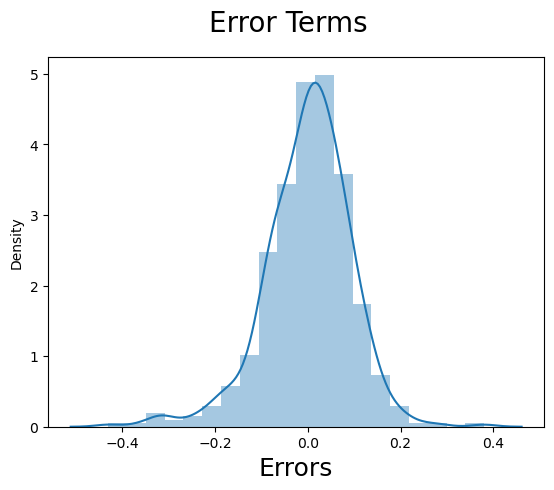

In [87]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

#### Predictions on the Test Set

In [88]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [89]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Applying the scaling on the test sets

In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm10 = sm.add_constant(X_test)

In [92]:
# Predict the y values corresponding to X_test_sm
y_pred = lr10.predict(X_test_lm10)

In [93]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8041

### Model Evaluation

Text(0, 0.5, 'y_pred')

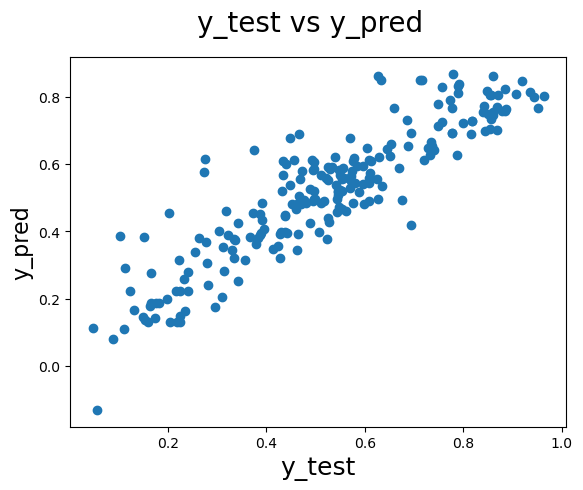

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [95]:
round(lr10.params,4)

const              0.2671
yr                 0.2354
holiday           -0.0970
temp               0.4078
windspeed         -0.1356
spring            -0.1162
winter             0.0480
light snow/rain   -0.2885
mist              -0.0786
sept               0.0700
dtype: float64

cnt = 0.2671 + 0.2354*yr - 0.0970*holiday + 0.4078*temp - 0.1356*windspeed - 0.1162*spring + 0.0480*winter - 0.2885*light snow/rain - 0.0786*mist + 0.0700*sept

###### R-squared:0.827
Adj. R-squared:0.824
The values of R-squared and adjusted R-squared are reasonably good fit as the values have to be above 0.7 or 0.8

R-squared (R2) and adjusted R-squared are both used to evaluate the goodness of fit of a regression model.
R^2 represents the proportion of the variance in the dependent variable explained by the independent variables.
Adjusted R-squared considers the number of predictors in the model and penalizes excessive variables, providing a more accurate measure of the model’s goodness of fit, especially with multiple predictors.

###### R^2 Value for Test

In [96]:
r2_score(y_test, y_pred)

0.8041402474517902

###### Adjusted R^2 Value for Test¶

In [97]:
X_test.shape

(219, 9)

In [98]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7957060954281832

Train R-squared: 0.827 Test R-squared: 0.804 Train Adjusted R-squared: 0.824 Test Adjusted R-squared: 0.796